# Introduction

For this project, we were all tasked with determining the best neighborhood in pittsburgh. in order to do this we had to first decide a metric so that we could mathematically determine the best. Our group decided to evaluate each neighborhood based on how well it accomodates a family with young children. The metrics we decided mattered most to a young family are, crime rate, because you dont want to raise a family somewhere you feel in danger, next we wanted to get a good school system for our budding family so we looked into how well each student was personally accomodated by the school by using IEP data to quantify what percentage of students are given an Individualized Education Plan, the last metric we looked at was playgrounds, because most young children benefit greatly from playing outside.

# Metric 1: Crime Density - Harry Alexander

Im using crime data to determine the safest neighborhood for a young family. I am going to do this by taking all of the crimes committed per neighborhood in the last 30 days, tallying them up, then putting them on a 0-1 scale, and lastly inverting those values so that a higher score means that area is safer.

First, we need these libraries to shape our data into usable forms

 - Pandas - For reading the CSV file from the website
 - Pyplot - For data visualization
 - Numpy - For calculating Z scores

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

First I need to import the CSV

In [45]:
df = pd.read_csv('Crimedata.csv')

Now I need to retrieve only the data from the Neighborhood column

Central Business District    382
South Side Flats             123
Carrick                       91
East Liberty                  85
Marshall-Shadeland            73
                            ... 
Arlington Heights              3
Outside County                 2
Regent Square                  2
Ridgemont                      1
East Carnegie                  1
Name: INCIDENTNEIGHBORHOOD, Length: 92, dtype: int64


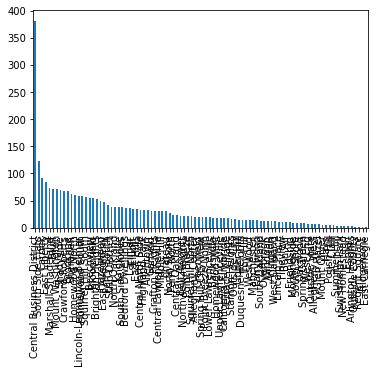

In [46]:
neighborhood_list = df['INCIDENTNEIGHBORHOOD'].value_counts()
print(neighborhood_list)
neighborhood_list.plot.bar()

As you can see there is definitely an outlier in the data so I used Numpy to remove it

In [47]:
counts = neighborhood_list.values
print(counts)
z_scores = (counts - np.mean(counts)) / np.std(counts)
outliers = np.abs(z_scores) > 3
counts = counts[~outliers]
print(counts)

[382 123  91  85  73  72  72  69  68  67  63  60  59  58  56  55  55  53
  49  47  41  39  39  38  38  37  36  35  34  33  33  32  31  30  30  30
  30  27  24  23  22  22  21  21  20  19  19  19  19  17  17  17  17  17
  16  16  15  15  15  15  14  14  13  13  12  12  12  11  11  11  10   9
   9   8   8   7   6   6   6   5   5   5   5   4   4   3   3   3   2   2
   1   1]
[123  91  85  73  72  72  69  68  67  63  60  59  58  56  55  55  53  49
  47  41  39  39  38  38  37  36  35  34  33  33  32  31  30  30  30  30
  27  24  23  22  22  21  21  20  19  19  19  19  17  17  17  17  17  16
  16  15  15  15  15  14  14  13  13  12  12  12  11  11  11  10   9   9
   8   8   7   6   6   6   5   5   5   5   4   4   3   3   3   2   2   1
   1]


Now I have to take the values and reintroduce them to their neighborhoods

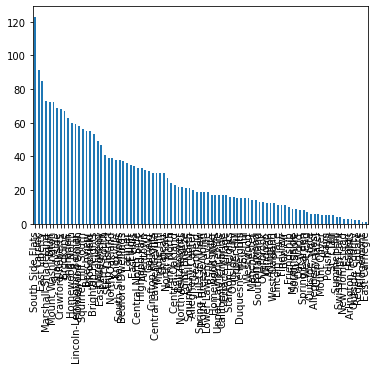

In [48]:
neighborhood_list= neighborhood_list.drop('Central Business District')
clean_data=pd.Series(counts, index=neighborhood_list.index)
neighborhood_list.plot.bar()


Now I need to put the data on a 0-1 scale

In [52]:
min_val = neighborhood_list.min()
max_val = neighborhood_list.max()
neighborhood_list = (neighborhood_list - min_val) / (max_val - min_val)

I also need to invert this data because currently the higher score mean a higher crime rate

South Side Flats      0.000000
Carrick               0.262295
East Liberty          0.311475
Marshall-Shadeland    0.409836
Bluff                 0.418033
                        ...   
Arlington Heights     0.983607
Outside County        0.991803
Regent Square         0.991803
Ridgemont             1.000000
East Carnegie         1.000000
Name: INCIDENTNEIGHBORHOOD, Length: 91, dtype: float64


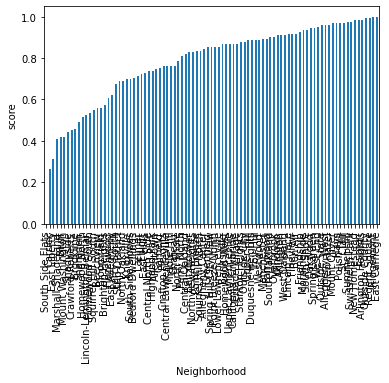

In [52]:
neighborhood_list = 1 - neighborhood_list

print(neighborhood_list)

ax =neighborhood_list.plot.bar()
ax.set_xlabel('Neighborhood')
ax.set_ylabel('score')
plt.show()

This graph is super cluttered by values that dont exactly matter, lets remove those

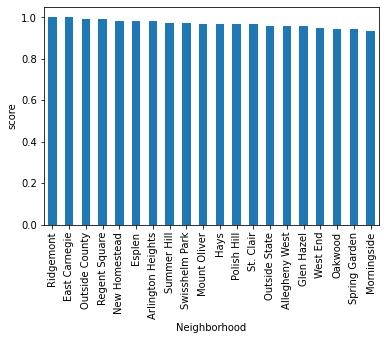

In [53]:
top_20 = neighborhood_list.nlargest(20)
ax = top_20.plot.bar()
ax.set_xlabel('Neighborhood')
ax.set_ylabel('score')
plt.show()

In 